![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Public/13.NLU_crashcourse_every_Spark_NLP_Model_in_one_line.ipynb)


# NLU 20 Minutes Crashcourse - the fast & easy Data Science route


## Spark NLP vs NLU, whats the difference?
[NLU](https://nlu.johnsnowlabs.com/) is a Python wrapper around Spark NLP. It gives you all of Spark NLPs features in 1 line of code and supports all the common Pythonic Data Structures like Pandas and Modin Dataframes. It's the ultimate tool to swifitly explore the models in Spark NLP and evaluate them for different use cases. With NLU you can : 

- Use any Model in Spark NLP in 1 line of code, by leveragin NLU's automatic pipeline generation
- Predicts on most common Python data structure like strings and Pandas array
- Transforms the Spark NLP Dataframe structure into a pretty Pandas Dataframe structure, which can be configured to `document`, `sentence`, `chunk`, and`token` output levels.
- Enables you to visualize outputs of  models in 1 line of code using the [viz methods](https://nlu.johnsnowlabs.com/docs/en/viz_examples)
- Use a [Powerful Streamlit Dashboard and Buildingblocks](https://nlu.johnsnowlabs.com/docs/en/streamlit_viz_examples) that enable to you to test out any model in 0 lines of code using a GUI. In addition, you can compare embeddings using various Manifold and Matrix Decomposition visualizations 



Under the hood, NLU automagically generates a Spark NLP pipeline for you, based on the model name you put in `nlu.load()`. All the NLP data transformations and predictions are still beeing performed by Spark NLP, NLU just gives you the most simple API possible for all of the features.      



NLU's core processing peformed on the data returned by Spark NLP is currently happening via the Numpy engine and will not be distributed by default, this means NLU is slower and takes up more memory than Spark NLP, because there is additional computation performed on your data.       
You have the option to set **.predict(return_spark_df =True)**. With this setting, NLU all computations will be **distributed** but NLU will not peform further data processing on the datafame, so you will get the standard Spark NLP Dataframe structure. 



This short notebook will teach you a lot of things!
- Sentiment classification, binary, multi class and regressive
- Extract Parts of Speech (POS)
- Extract Named Entities (NER)
- Extract Keywords (YAKE!)
- Answer Open and Closed book questions with T5
- Summarize text and more with Multi task T5
- Translate text with Microsofts Marian Model
- Train a Multi Lingual Classifier for 100+ languages from a dataset with just one language

## NLU Webinars and Video Tutorials
- [NLU & Streamlit Tutorial](https://vimeo.com/579508034#)
- [Crash course of the 50 + Medical Domains and the 200+ Healtchare models in NLU](https://www.youtube.com/watch?v=gGDsZXt1SF8)
- [Multi Lingual NLU Webinar - Tutorial on Chinese News dataset](https://www.youtube.com/watch?v=ftAOqJuxnV4)
- [John Snow Labs NLU: Become a Data Science Superhero with One Line of Python code](https://events.johnsnowlabs.com/john-snow-labs-nlu-become-a-data-science-superhero-with-one-line-of-python-code?hsCtaTracking=c659363c-2188-4c86-945f-5cfb7b42fcfc%7C8b2b188b-92a3-48ba-ad7e-073b384425b0)
- [Python Web Def Conf - Python's NLU library: 1,000+ Models, 200+ Languages, State of the Art Accuracy, 1 Line of Code](https://2021.pythonwebconf.com/presentations/john-snow-labs-nlu-the-simplicity-of-python-the-power-of-spark-nlp)
- [NYC/DC NLP Meetup with NLU](https://youtu.be/hJR9m3NYnwk?t=2155)


## More ressources 
- [Join our Slack](https://join.slack.com/t/spark-nlp/shared_invite/zt-lutct9gm-kuUazcyFKhuGY3_0AMkxqA)
- [NLU Website](https://nlu.johnsnowlabs.com/)
- [NLU Github](https://github.com/JohnSnowLabs/nlu)
- [Many more NLU example tutorials](https://github.com/JohnSnowLabs/nlu/tree/master/examples)
- [Overview of every powerful nlu 1-liner](https://nlu.johnsnowlabs.com/docs/en/examples)
- [Checkout the Modelshub for an overview of all models](https://nlp.johnsnowlabs.com/models) 
- [Checkout the NLU Namespace where you can find every model as a tabel](https://nlu.johnsnowlabs.com/docs/en/spellbook)
- [Intro to NLU article](https://medium.com/spark-nlp/1-line-of-code-350-nlp-models-with-john-snow-labs-nlu-in-python-2f1c55bba619)
- [Indepth and easy Sentence Similarity Tutorial, with StackOverflow Questions using BERTology embeddings](https://medium.com/spark-nlp/easy-sentence-similarity-with-bert-sentence-embeddings-using-john-snow-labs-nlu-ea078deb6ebf)
- [1 line of Python code for BERT, ALBERT, ELMO, ELECTRA, XLNET, GLOVE, Part of Speech with NLU and t-SNE](https://medium.com/spark-nlp/1-line-of-code-for-bert-albert-elmo-electra-xlnet-glove-part-of-speech-with-nlu-and-t-sne-9ebcd5379cd)

# Install NLU
You need Java8, Pyspark and Spark-NLP installed, [see the installation guide for instructions](https://nlu.johnsnowlabs.com/docs/en/install). If you need help or run into troubles, [ping us on slack :)](https://join.slack.com/t/spark-nlp/shared_invite/zt-lutct9gm-kuUazcyFKhuGY3_0AMkxqA) 

In [ ]:
!wget https://setup.johnsnowlabs.com/nlu/colab.sh -O - | bash

import nlu

# Simple NLU basics on Strings

## Context based spell Checking in 1 line

![Spell Check](https://i.imgflip.com/52wb7w.jpg)

In [ ]:
nlu.load('spell').predict('I also liek to live dangertus')

spellcheck_dl download started this may take some time.
Approximate size to download 111.4 MB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]


,document,sentence,token,spell
0,I also liek to live dangertus,[I also liek to live dangertus],"[I, also, liek, to, live, dangertus]","[I, also, like, to, live, dangerous]"


## Binary Sentiment classification in 1 Line
![Binary Sentiment](https://cdn.pixabay.com/photo/2015/11/13/10/07/smiley-1041796_960_720.jpg)


In [ ]:
nlu.load('sentiment').predict('I love NLU and rainy days!')

sentimentdl_glove_imdb download started this may take some time.
Approximate size to download 8.7 MB
[OK!]
glove_100d download started this may take some time.
Approximate size to download 145.3 MB
[OK!]
glove_100d download started this may take some time.
Approximate size to download 145.3 MB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]


,document,sentence,sentiment_confidence,sentiment,token,word_embedding_glove_100d,sentence_embedding_
0,I love NLU and rainy days!,[I love NLU and rainy days!],0.999995,pos,"[I, love, NLU, and, rainy, days, !]","[[-0.046539, 0.61966, 0.56647, -0.46584, -1.18...","[[0.015170136, 0.3010264, 0.33611855, -0.37595..."


## Part of Speech (POS) in 1 line
![Parts of Speech](https://image.shutterstock.com/image-photo/blackboard-background-written-colorful-chalk-600w-1166166529.jpg)

|Tag |Description | Example|
|------|------------|------|
|CC| Coordinating conjunction | This batch of mushroom stew is savory **and** delicious    |
|CD| Cardinal number | Here are **five** coins    |
|DT| Determiner | **The** bunny went home    |
|EX| Existential there | **There** is a storm coming    |
|FW| Foreign word | I'm having a **déjà vu**    |
|IN| Preposition or subordinating conjunction | He is cleverer **than** I am   |
|JJ| Adjective | She wore a **beautiful** dress    |
|JJR| Adjective, comparative | My house is **bigger** than yours    |
|JJS| Adjective, superlative | I am the **shortest** person in my family   |
|LS| List item marker | A number of things need to be considered before starting a business **,** such as premises **,** finance **,** product demand **,** staffing and access to customers |
|MD| Modal | You **must** stop when the traffic lights turn red    |
|NN| Noun, singular or mass | The **dog** likes to run    |
|NNS| Noun, plural | The **cars** are fast    |
|NNP| Proper noun, singular | I ordered the chair from **Amazon**  |
|NNPS| Proper noun, plural | We visted the **Kennedys**   |
|PDT| Predeterminer | **Both** the children had a toy   |
|POS| Possessive ending | I built the dog'**s** house    |
|PRP| Personal pronoun | **You** need to stop    |
|PRP$| Possessive pronoun | Remember not to judge a book by **its** cover |
|RB| Adverb | The dog barks **loudly**    |
|RBR| Adverb, comparative | Could you sing more **quietly** please?   |
|RBS| Adverb, superlative | Everyone in the race ran fast, but John ran **the fastest** of all    |
|RP| Particle | He ate **up** all his dinner    |
|SYM| Symbol | What are you doing **?**    |
|TO| to | Please send it back **to** me    |
|UH| Interjection | **Wow!** You look gorgeous    |
|VB| Verb, base form | We **play** soccer |
|VBD| Verb, past tense | I **worked** at a restaurant    |
|VBG| Verb, gerund or present participle | **Smoking** kills people   |
|VBN| Verb, past participle | She has **done** her homework    |
|VBP| Verb, non-3rd person singular present | You **flit** from place to place    |
|VBZ| Verb, 3rd person singular present | He never **calls** me    |
|WDT| Wh-determiner | The store honored the complaints, **which** were less than 25 days old    |
|WP| Wh-pronoun | **Who** can help me?    |
|WP\$| Possessive wh-pronoun | **Whose** fault is it?    |
|WRB| Wh-adverb | **Where** are you going?  |

In [ ]:
nlu.load('pos').predict('POS assigns each token in a sentence a grammatical label')

pos_anc download started this may take some time.
Approximate size to download 3.9 MB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]


,document,sentence,token,pos
0,POS assigns each token in a sentence a grammat...,[POS assigns each token in a sentence a gramma...,"[POS, assigns, each, token, in, a, sentence, a...","[NNP, NNS, DT, NN, IN, DT, NN, DT, JJ, NN]"


## Named Entity Recognition (NER) in 1 line

![NER](http://ckl-it.de/wp-content/uploads/2021/02/ner-1.png)

|Type | 	Description |
|------|--------------|
| PERSON | 	People, including fictional like **Harry Potter** |
| NORP | 	Nationalities or religious or political groups like the **Germans** |
| FAC | 	Buildings, airports, highways, bridges, etc. like **New York Airport** |
| ORG | 	Companies, agencies, institutions, etc. like **Microsoft** |
| GPE | 	Countries, cities, states. like **Germany** |
| LOC | 	Non-GPE locations, mountain ranges, bodies of water. Like the **Sahara desert**|
| PRODUCT | 	Objects, vehicles, foods, etc. (Not services.) like **playstation** |
| EVENT | 	Named hurricanes, battles, wars, sports events, etc. like **hurricane Katrina**|
| WORK_OF_ART | 	Titles of books, songs, etc. Like **Mona Lisa** |
| LAW | 	Named documents made into laws. Like : **Declaration of Independence** |
| LANGUAGE | 	Any named language. Like **Turkish**|
| DATE | 	Absolute or relative dates or periods. Like every second **friday**|
| TIME | 	Times smaller than a day. Like **every minute**|
| PERCENT | 	Percentage, including ”%“. Like **55%** of workers enjoy their work |
| MONEY | 	Monetary values, including unit. Like **50$** for those pants |
| QUANTITY | 	Measurements, as of weight or distance. Like this person weights **50kg** |
| ORDINAL | 	“first”, “second”, etc. Like David placed **first** in the tournament |
| CARDINAL | 	Numerals that do not fall under another type. Like **hundreds** of models are avaiable in NLU |


In [ ]:
nlu.load('ner').predict("John Snow Labs congratulates the Amarican John Biden to winning the American election!", output_level='chunk')

onto_recognize_entities_sm download started this may take some time.
Approx size to download 160.1 MB
[OK!]


,document,entities,entities_confidence,entities_class,word_embedding_ner
0,John Snow Labs congratulates the Amarican John...,John Snow Labs,0.8046667,PERSON,"[[-0.2747400104999542, 0.48680999875068665, -0..."
0,John Snow Labs congratulates the Amarican John...,the Amarican,0.46429998,PERSON,"[[-0.2747400104999542, 0.48680999875068665, -0..."
0,John Snow Labs congratulates the Amarican John...,John Biden,0.83775,PERSON,"[[-0.2747400104999542, 0.48680999875068665, -0..."
0,John Snow Labs congratulates the Amarican John...,American,0.9877,NORP,"[[-0.2747400104999542, 0.48680999875068665, -0..."


# Let's apply NLU to a dataset!

<div>
<img src="http://ckl-it.de/wp-content/uploads/2021/02/crypto.jpeg " width="400"  height="250" >
</div>


In [ ]:
import pandas as pd 
import nlu
!wget http://ckl-it.de/wp-content/uploads/2020/12/small_btc.csv 
df = pd.read_csv('/content/small_btc.csv').iloc[0:5000].title
df



--2021-10-13 10:31:22--  http://ckl-it.de/wp-content/uploads/2020/12/small_btc.csv
Resolving ckl-it.de (ckl-it.de)... 217.160.0.108, 2001:8d8:100f:f000::209
Connecting to ckl-it.de (ckl-it.de)|217.160.0.108|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22244914 (21M) [text/csv]
Saving to: ‘small_btc.csv’

small_btc.csv       100%[===================>]  21.21M  13.3MB/s    in 1.6s    

2021-10-13 10:31:24 (13.3 MB/s) - ‘small_btc.csv’ saved [22244914/22244914]



0          Bitcoin Price Update: Will China Lead us Down?
1       Key Bitcoin Price Levels for Week 51 (15 – 22 ...
2       National Australia Bank, Citing Highly Flawed ...
3       Chinese Bitcoin Ban Driven by  Chinese Banking...
4                   Bitcoin Trade Update: Opened Position
                              ...                        
1995    Bitcoin Bill Pay Company Living Room of Satosh...
1996    NYDFS Extends BitLicense Bitcoin Regulation Co...
1997    Bitfinex Passes Stefan Thomas’s Proof Of Solve...
1998    Cryptocurrency Exchange Platform AlphaPoint Pa...
1999    Want to Buy And Sell Bitcoin Fast and Secure? ...
Name: title, Length: 2000, dtype: object

## NER on a Crypto News dataset
### The **NER** model which you can load via `nlu.load('ner')` recognizes 18 different classes in your dataset.
We set output level to chunk, so that we get 1 row per NER class.


#### Predicted entities:


NER is avaiable in many languages, which you can [find in the John Snow Labs Modelshub](https://nlp.johnsnowlabs.com/models)

In [ ]:
ner_df = nlu.load('ner').predict(df, output_level = 'chunk')
ner_df 

onto_recognize_entities_sm download started this may take some time.
Approx size to download 160.1 MB
[OK!]


,document,entities,entities_confidence,entities_class,word_embedding_ner
0,Bitcoin Price Update: Will China Lead us Down?,NaN,NaN,NaN,"[[0.8403199911117554, 0.13267000019550323, -0...."
1,Key Bitcoin Price Levels for Week 51 (15 – 22 ...,Week 51 (15 – 22,0.76498336,DATE,"[[-0.22009000182151794, 0.12280000001192093, 0..."
2,"National Australia Bank, Citing Highly Flawed ...",Australia,0.7022,GPE,"[[-0.003313800087198615, 0.3894599974155426, 0..."
3,Chinese Bitcoin Ban Driven by Chinese Banking...,Chinese,0.9957,NORP,"[[0.4327400028705597, 0.3958199918270111, 0.58..."
3,Chinese Bitcoin Ban Driven by Chinese Banking...,Chinese,0.9437,NORP,"[[0.4327400028705597, 0.3958199918270111, 0.58..."
...,...,...,...,...,...
1995,Bitcoin Bill Pay Company Living Room of Satosh...,NaN,NaN,NaN,"[[0.8403199911117554, 0.13267000019550323, -0...."
1996,NYDFS Extends BitLicense Bitcoin Regulation Co...,NaN,NaN,NaN,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1997,Bitfinex Passes Stefan Thomas’s Proof Of Solve...,Bitfinex Passes,0.70669997,PERSON,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1998,Cryptocurrency Exchange Platform AlphaPoint Pa...,NaN,NaN,NaN,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


### Top 50 Named Entities

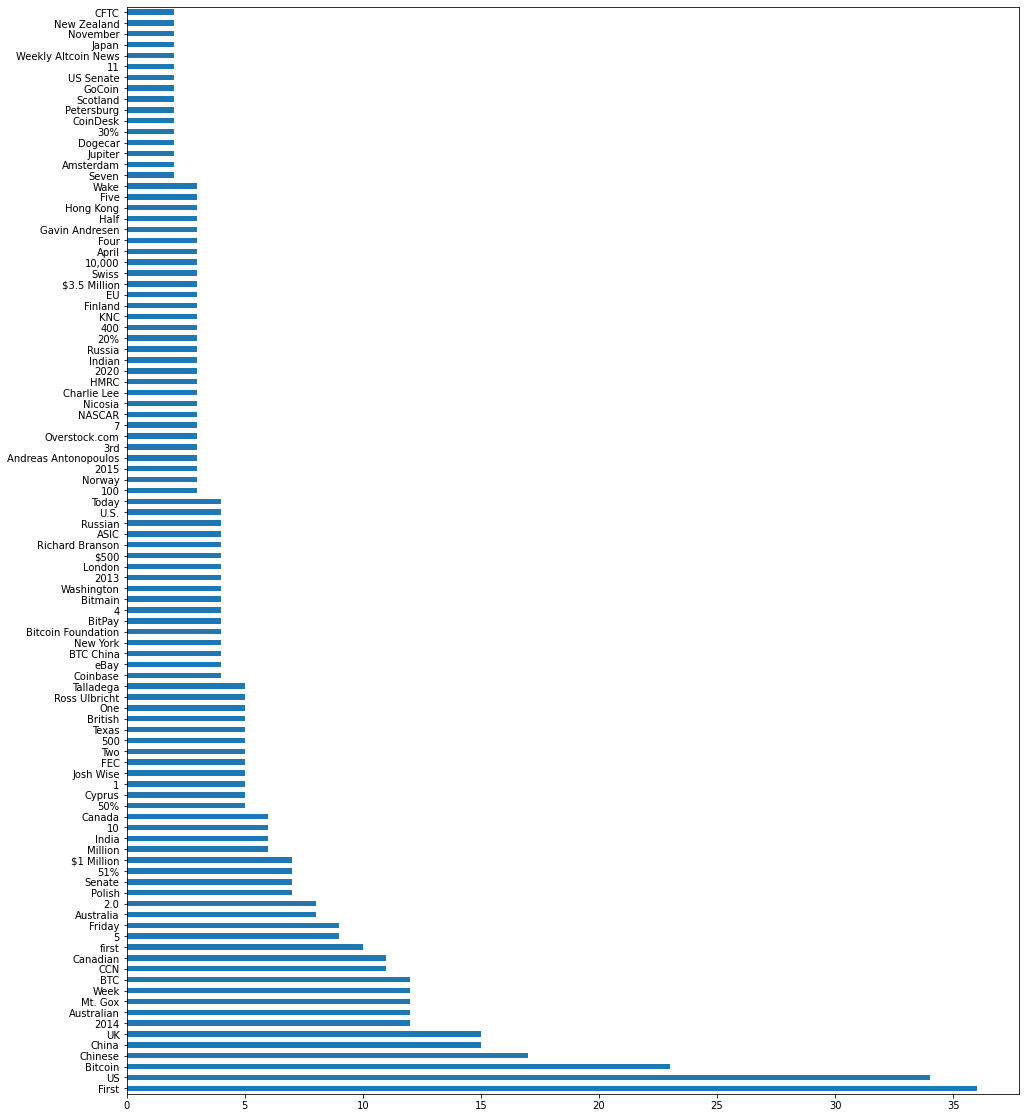

In [ ]:
ner_df.entities.value_counts()[:100].plot.barh(figsize = (16,20))

### Top 50 Named Entities which are PERSONS

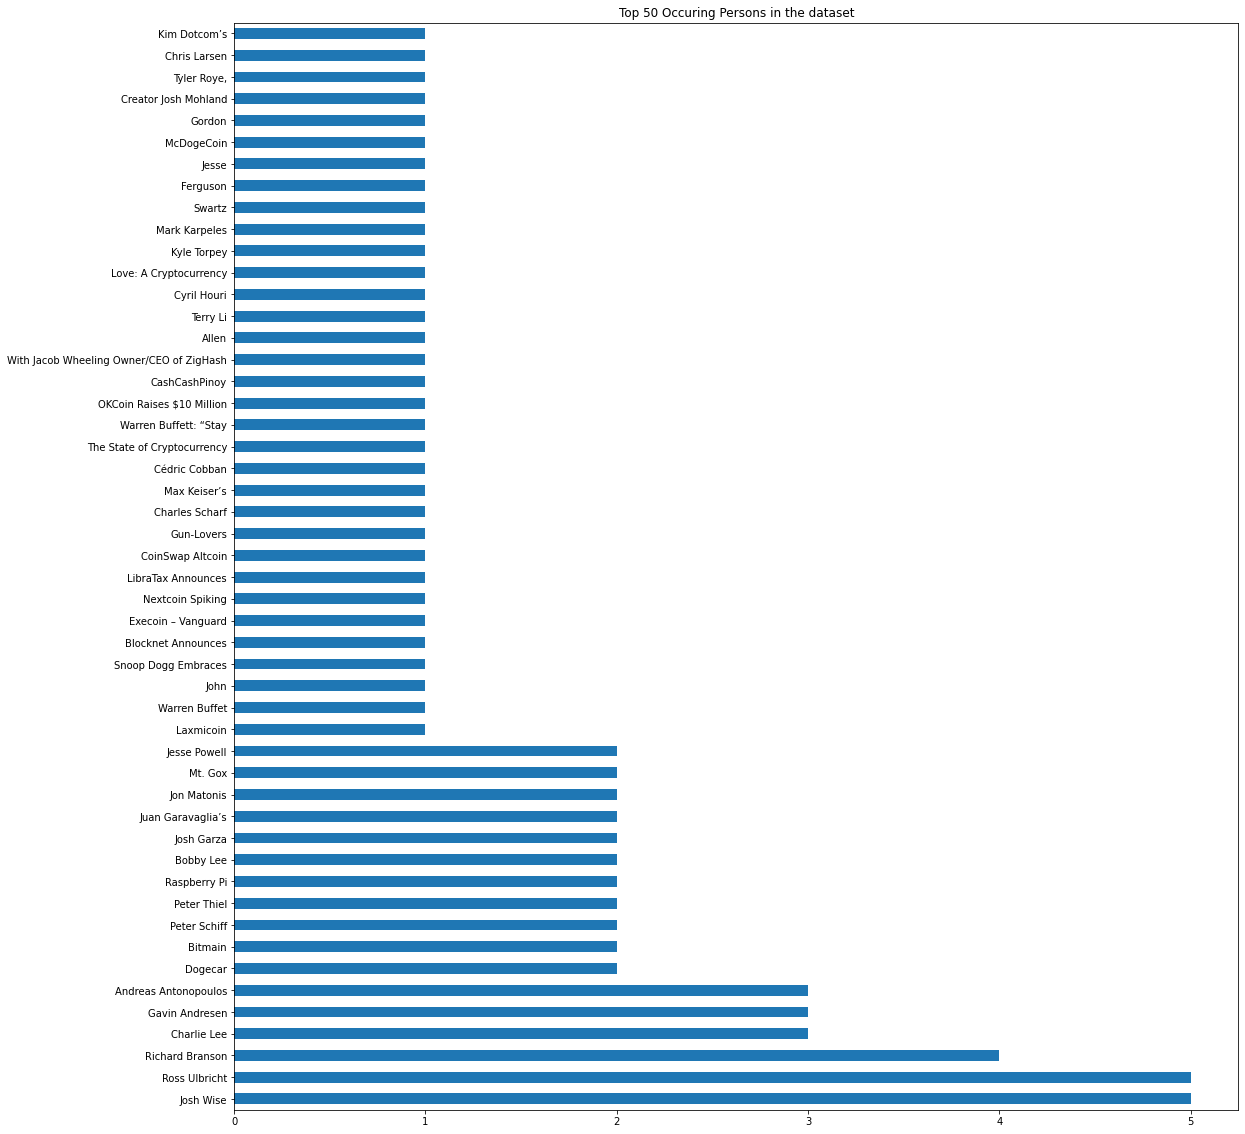

In [ ]:
ner_df[ner_df.entities_class == 'PERSON'].entities.value_counts()[:50].plot.barh(figsize=(18,20), title ='Top 50 Occuring Persons in the dataset')

### Top 50 Named Entities which are Countries/Cities/States

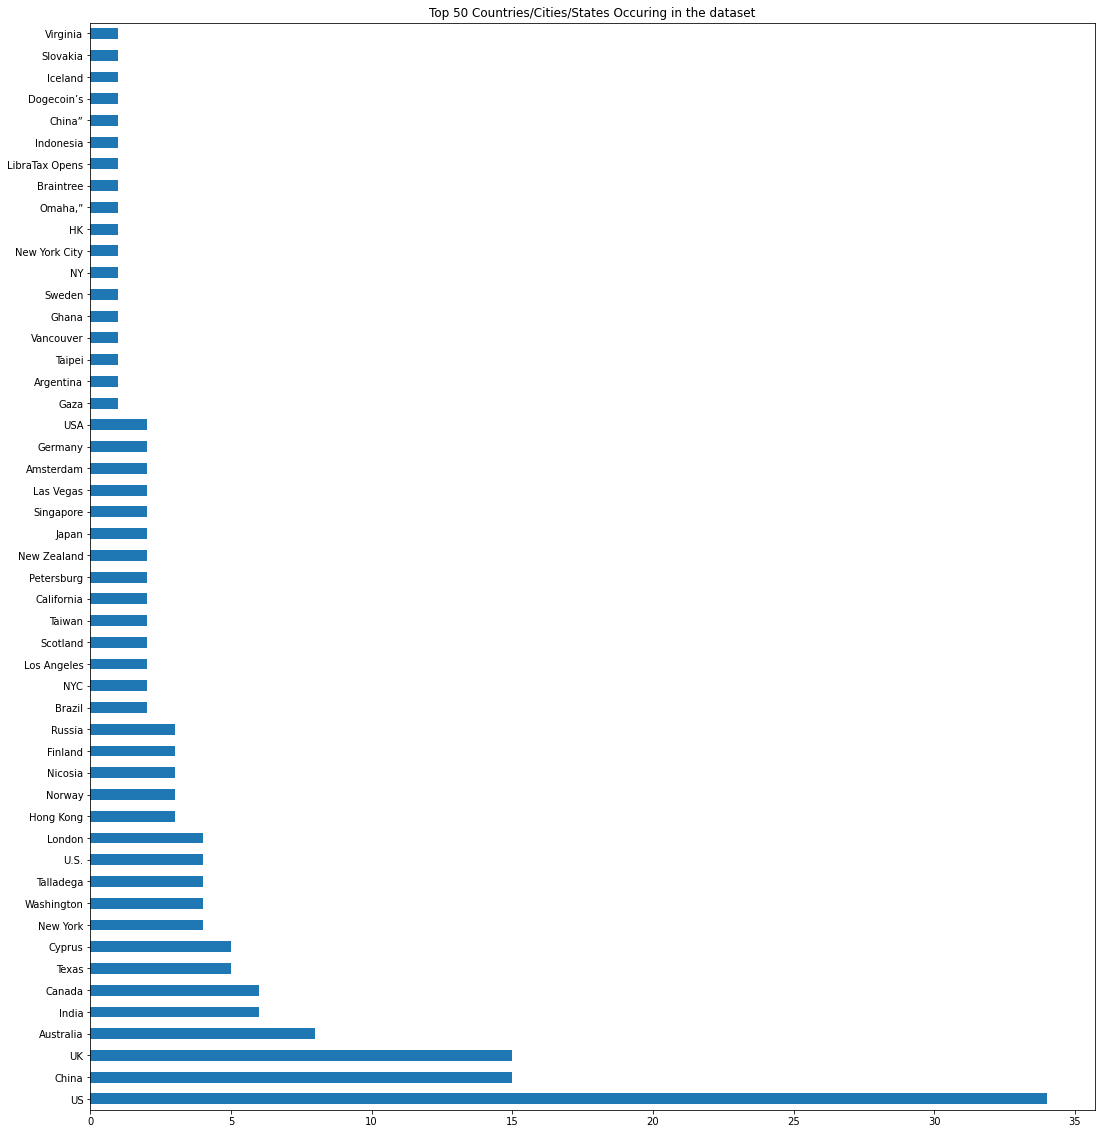

In [ ]:
ner_df[ner_df.entities_class == 'GPE'].entities.value_counts()[:50].plot.barh(figsize=(18,20),title ='Top 50 Countries/Cities/States Occuring in the dataset')

### Top 50 Named Entities which are PRODUCTS 

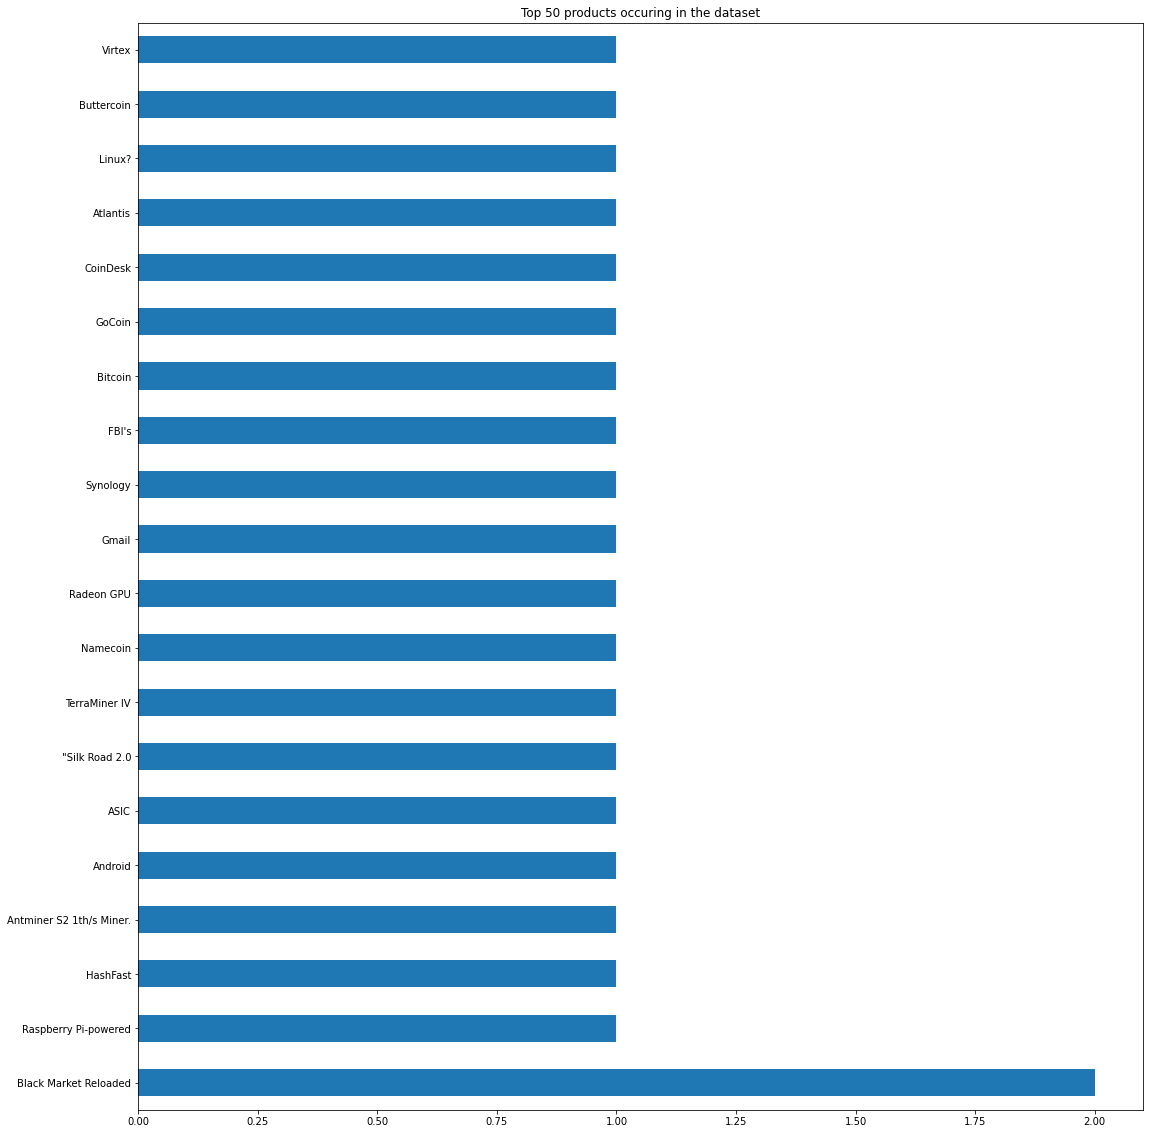

In [ ]:
ner_df[ner_df.entities_class == 'PRODUCT'].entities.value_counts()[:50].plot.barh(figsize=(18,20),title ='Top 50 products occuring in the dataset')

### Top 50 Named Entities which are ORGANIZATIONS

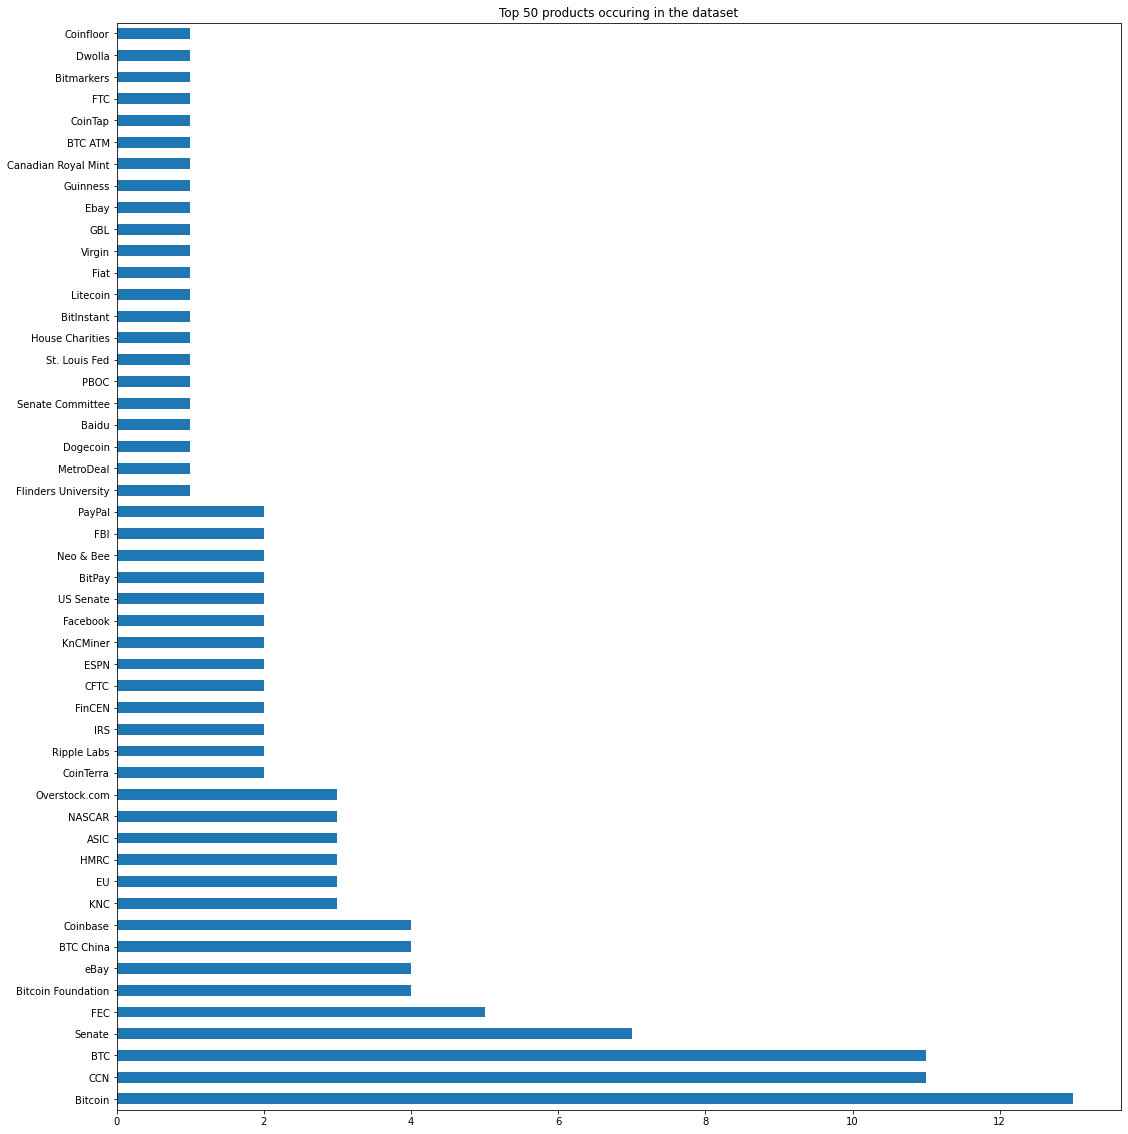

In [ ]:
ner_df[ner_df.entities_class == 'ORG'].entities.value_counts()[:50].plot.barh(figsize=(18,20),title ='Top 50 products occuring in the dataset')

## YAKE on a Crypto News dataset
### The **YAKE!** model (Yet Another Keyword Extractor) is a **unsupervised** keyword extraction algorithm.
You can load it via   which you can load via `nlu.load('yake')`. It has no weights and is very fast.
It has various parameters that can be configured to influence which keywords are beeing extracted, [here for an more indepth YAKE guide](https://github.com/JohnSnowLabs/nlu/blob/master/examples/webinars_conferences_etc/multi_lingual_webinar/1_NLU_base_features_on_dataset_with_YAKE_Lemma_Stemm_classifiers_NER_.ipynb)

In [ ]:
yake_df = nlu.load('yake').predict(df)
yake_df

sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]


,keywords_confidence,document,sentence,keywords,token
0,"[0.5798862558280943, 0.5798862558280943, 0.506...",Bitcoin Price Update: Will China Lead us Down?,[Bitcoin Price Update: Will China Lead us Down?],"[update, china, china lead]","[Bitcoin, Price, Update, :, Will, China, Lead,..."
1,"[0.5798862558280943, 0.5798862558280943, 0.506...",Key Bitcoin Price Levels for Week 51 (15 – 22 ...,[Key Bitcoin Price Levels for Week 51 (15 – 22...,"[price, levels, price levels]","[Key, Bitcoin, Price, Levels, for, Week, 51, (..."
2,"[0.2865403036044788, 0.1955397590159521, 0.195...","National Australia Bank, Citing Highly Flawed ...","[National Australia Bank, Citing Highly Flawed...","[bubble, citing highly flawed, highly flawed d...","[National, Australia, Bank, ,, Citing, Highly,..."
3,"[0.29364120139579386, 0.29364120139579386, 0.2...",Chinese Bitcoin Ban Driven by Chinese Banking ...,[Chinese Bitcoin Ban Driven by Chinese Banking...,"[ban driven, banking crisis, bitcoin ban driven]","[Chinese, Bitcoin, Ban, Driven, by, Chinese, B..."
4,"[0.5798862558280943, 0.26804494089513314, 0.18...",Bitcoin Trade Update: Opened Position,[Bitcoin Trade Update: Opened Position],"[update, position, opened position]","[Bitcoin, Trade, Update, :, Opened, Position]"
...,...,...,...,...,...
1995,"[0.26804494089513314, 0.1840422979793308, 0.16...",Bitcoin Bill Pay Company Living Room of Satosh...,[Bitcoin Bill Pay Company Living Room of Satos...,"[operations, resumes operations, satoshi resum...","[Bitcoin, Bill, Pay, Company, Living, Room, of..."
1996,"[0.26804494089513314, 0.1840422979793308, 0.16...",NYDFS Extends BitLicense Bitcoin Regulation Co...,[NYDFS Extends BitLicense Bitcoin Regulation C...,"[period, comment period, regulation comment pe...","[NYDFS, Extends, BitLicense, Bitcoin, Regulati..."
1997,"[0.5798862558280943, 0.26804494089513314, 0.18...",Bitfinex Passes Stefan Thomas’s Proof Of Solve...,[Bitfinex Passes Stefan Thomas’s Proof Of Solv...,"[proof, audit, solvency audit]","[Bitfinex, Passes, Stefan, Thomas’s, Proof, Of..."
1998,"[0.5798862558280943, 0.26804494089513314, 0.18...",Cryptocurrency Exchange Platform AlphaPoint Pa...,[Cryptocurrency Exchange Platform AlphaPoint P...,"[platform, growth, support growth]","[Cryptocurrency, Exchange, Platform, AlphaPoin..."


### Top 50 extracted Keywords with YAKE!

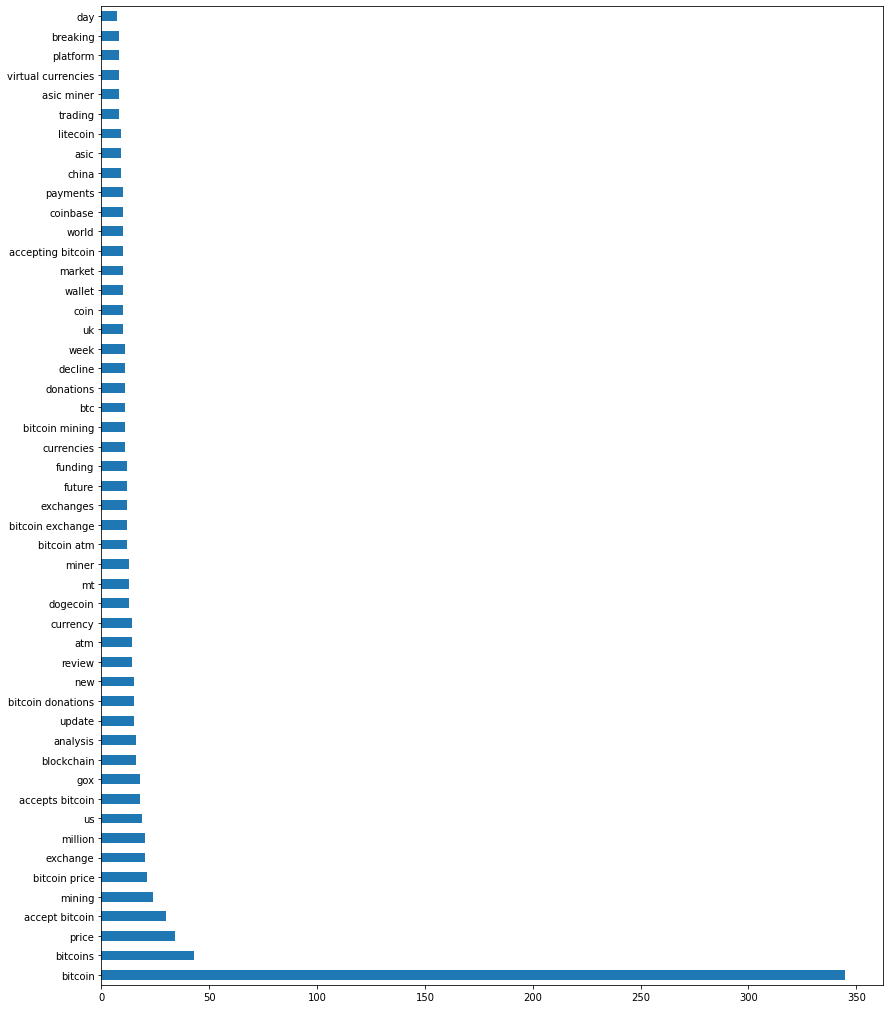

In [ ]:
yake_df.explode('keywords').keywords.value_counts()[0:50].plot.barh(figsize=(14,18))

## Binary Sentimental Analysis and Distribution on a dataset

In [ ]:
sent_df = nlu.load('sentiment').predict(df)
sent_df

sentimentdl_glove_imdb download started this may take some time.
Approximate size to download 8.7 MB
[OK!]
glove_100d download started this may take some time.
Approximate size to download 145.3 MB
[OK!]
glove_100d download started this may take some time.
Approximate size to download 145.3 MB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]


,document,sentence,sentiment_confidence,sentiment,token,word_embedding_glove_100d,sentence_embedding_
0,Bitcoin Price Update: Will China Lead us Down?,[Bitcoin Price Update: Will China Lead us Down?],0.899232,neg,"[Bitcoin, Price, Update, :, Will, China, Lead,...","[[0.84032, 0.13267, -0.61584, 0.16593, 0.49351...","[[0.03502599, 0.38203913, 0.764685, -0.2690736..."
1,Key Bitcoin Price Levels for Week 51 (15 – 22 ...,[Key Bitcoin Price Levels for Week 51 (15 – 22...,0.994394,neg,"[Key, Bitcoin, Price, Levels, for, Week, 51, (...","[[-0.22009, 0.1228, 0.49666, 0.014973, 0.58537...","[[0.049413078, 0.119584836, 0.17347363, -0.108..."
2,"National Australia Bank, Citing Highly Flawed ...","[National Australia Bank, Citing Highly Flawed...",0.998585,neg,"[National, Australia, Bank, ,, Citing, Highly,...","[[-0.0033138, 0.38946, 0.2635, -0.29199, 0.380...","[[-0.11782206, 0.021873768, 0.3421415, -0.1564..."
3,Chinese Bitcoin Ban Driven by Chinese Banking ...,[Chinese Bitcoin Ban Driven by Chinese Banking...,0.999998,neg,"[Chinese, Bitcoin, Ban, Driven, by, Chinese, B...","[[0.43274, 0.39582, 0.58779, 0.56459, 0.38507,...","[[0.1956089, 0.19520444, 0.3102539, -0.0743547..."
4,Bitcoin Trade Update: Opened Position,[Bitcoin Trade Update: Opened Position],0.985043,pos,"[Bitcoin, Trade, Update, :, Opened, Position]","[[0.84032, 0.13267, -0.61584, 0.16593, 0.49351...","[[0.048274994, 0.14680083, 0.3768833, 0.032076..."
...,...,...,...,...,...,...,...
1995,Bitcoin Bill Pay Company Living Room of Satosh...,[Bitcoin Bill Pay Company Living Room of Satos...,0.998877,neg,"[Bitcoin, Bill, Pay, Company, Living, Room, of...","[[0.84032, 0.13267, -0.61584, 0.16593, 0.49351...","[[0.1624147, 0.0661572, 0.089957595, -0.154957..."
1996,NYDFS Extends BitLicense Bitcoin Regulation Co...,[NYDFS Extends BitLicense Bitcoin Regulation C...,0.998673,neg,"[NYDFS, Extends, BitLicense, Bitcoin, Regulati...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.12825885, -0.13787429, 0.17119269, 0.12430..."
1997,Bitfinex Passes Stefan Thomas’s Proof Of Solve...,[Bitfinex Passes Stefan Thomas’s Proof Of Solv...,0.999471,neg,"[Bitfinex, Passes, Stefan, Thomas’s, Proof, Of...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[-0.22165588, -0.19953999, 0.50639373, -0.104..."
1998,Cryptocurrency Exchange Platform AlphaPoint Pa...,[Cryptocurrency Exchange Platform AlphaPoint P...,0.999911,pos,"[Cryptocurrency, Exchange, Platform, AlphaPoin...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.027292732, 0.33720642, -0.0044379085, 0.02..."


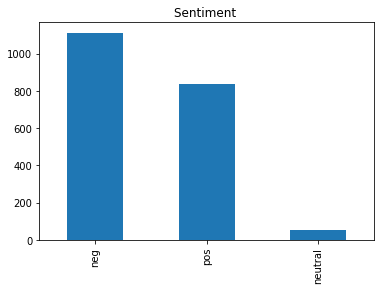

In [ ]:
sent_df.sentiment.value_counts().plot.bar(title='Sentiment ')

## Emotional Analysis and Distribution of Headlines 

In [ ]:
emo_df = nlu.load('emotion').predict(df)
emo_df

classifierdl_use_emotion download started this may take some time.
Approximate size to download 21.3 MB
[OK!]
tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]


,sentence_embedding_use,document,sentence,emotion,emotion_confidence_confidence
0,"[[0.05829371139407158, -0.036904484033584595, ...",Bitcoin Price Update: Will China Lead us Down?,[Bitcoin Price Update: Will China Lead us Down?],[fear],[0.9981729]
1,"[[0.038088250905275345, -0.04514157399535179, ...",Key Bitcoin Price Levels for Week 51 (15 – 22 ...,[Key Bitcoin Price Levels for Week 51 (15 – 22...,[joy],[0.9976956]
2,"[[0.05034318566322327, -0.01303655095398426, -...","National Australia Bank, Citing Highly Flawed ...","[National Australia Bank, Citing Highly Flawed...",[fear],[0.9999975]
3,"[[0.055152829736471176, -0.05237917602062225, ...",Chinese Bitcoin Ban Driven by Chinese Banking ...,[Chinese Bitcoin Ban Driven by Chinese Banking...,[fear],[0.9991346]
4,"[[0.05926975607872009, -0.056463420391082764, ...",Bitcoin Trade Update: Opened Position,[Bitcoin Trade Update: Opened Position],[joy],[0.9988637]
...,...,...,...,...,...
1995,"[[0.06101563200354576, -0.038709379732608795, ...",Bitcoin Bill Pay Company Living Room of Satosh...,[Bitcoin Bill Pay Company Living Room of Satos...,[joy],[0.9940252]
1996,"[[0.0639236643910408, -0.05505230277776718, -0...",NYDFS Extends BitLicense Bitcoin Regulation Co...,[NYDFS Extends BitLicense Bitcoin Regulation C...,[fear],[0.9982809]
1997,"[[0.059178080409765244, -0.041498005390167236,...",Bitfinex Passes Stefan Thomas’s Proof Of Solve...,[Bitfinex Passes Stefan Thomas’s Proof Of Solv...,[fear],[0.7720523]
1998,"[[0.05369672179222107, -0.023480931296944618, ...",Cryptocurrency Exchange Platform AlphaPoint Pa...,[Cryptocurrency Exchange Platform AlphaPoint P...,[joy],[0.99934787]


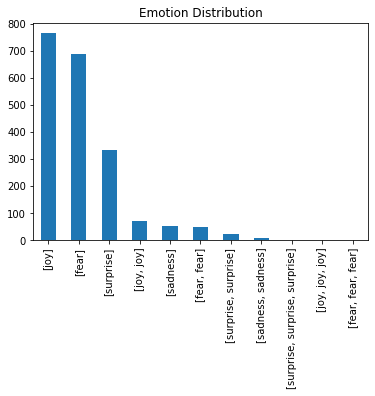

In [ ]:
emo_df.emotion.value_counts().plot.bar(title='Emotion Distribution')


**Make sure to restart your notebook again** before starting the next section

In [ ]:
print("Please restart kernel if you are in google colab to free up RAM")
1+'wait'


# Answer **Closed Book** and Open **Book Questions** with Google's T5!

<!-- [T5]() -->
![T5 GIF](https://1.bp.blogspot.com/-o4oiOExxq1s/Xk26XPC3haI/AAAAAAAAFU8/NBlvOWB84L0PTYy9TzZBaLf6fwPGJTR0QCLcBGAsYHQ/s1600/image3.gif)

You can load the **question answering** model with `nlu.load('en.t5')`

In [ ]:
import nlu
# Load question answering T5 model
t5_closed_question = nlu.load('en.t5')

google_t5_small_ssm_nq download started this may take some time.
Approximate size to download 139 MB
[OK!]


## Answer **Closed Book Questions**  
Closed book means that no additional context is given and the model must answer the question with the knowledge stored in it's weights

In [ ]:
t5_closed_question.predict("Who is president of Nigeria?")

,document,t5
0,Who is president of Nigeria?,Muhammadu Buhari


In [ ]:
t5_closed_question.predict("What is the most common language in India?")

,document,t5
0,What is the most common language in India?,Hindi


In [ ]:
t5_closed_question.predict("What is the capital of Germany?")

,document,t5
0,What is the capital of Germany?,Berlin


## Answer **Open Book Questions** 
These are questions where we give the model some additional context, that is used to answer the question

In [ ]:
t5_open_book = nlu.load('answer_question')

t5_base download started this may take some time.
Approximate size to download 446 MB
[OK!]


In [ ]:
context   = 'Peters last week was terrible! He had an accident and broke his leg while skiing!'
question1  = 'Why was peters week so bad?' 
question2  = 'How did peter broke his leg?' 

t5_open_book.predict([question1+context, question2 + context]) 

,document,t5
0,Why was peters week so bad?Peters last week wa...,He had an accident and broke his leg while skiing
1,How did peter broke his leg?Peters last week w...,skiing


In [ ]:
# Ask T5 questions in the context of a News Article
question1 = 'Who is Jack ma?'
question2 = 'Who is founder of Alibaba Group?'
question3 = 'When did Jack Ma re-appear?'
question4 = 'How did Alibaba stocks react?'
question5 = 'Whom did Jack Ma meet?'
question6 = 'Who did Jack Ma hide from?'


# from https://www.bbc.com/news/business-55728338 
news_article_context = """ context:
Alibaba Group founder Jack Ma has made his first appearance since Chinese regulators cracked down on his business empire.
His absence had fuelled speculation over his whereabouts amid increasing official scrutiny of his businesses.
The billionaire met 100 rural teachers in China via a video meeting on Wednesday, according to local government media.
Alibaba shares surged 5% on Hong Kong's stock exchange on the news.
"""

questions = [
             question1+ news_article_context,
             question2+ news_article_context,
             question3+ news_article_context,
             question4+ news_article_context,
             question5+ news_article_context,
             question6+ news_article_context,]



In [ ]:
t5_open_book.predict(questions)

,document,t5
0,Who is Jack ma? context: Alibaba Group founder...,Alibaba Group founder
1,Who is founder of Alibaba Group? context: Alib...,Jack Ma
2,When did Jack Ma re-appear? context: Alibaba G...,Wednesday
3,How did Alibaba stocks react? context: Alibaba...,surged 5%
4,Whom did Jack Ma meet? context: Alibaba Group ...,100 rural teachers
5,Who did Jack Ma hide from? context: Alibaba Gr...,Chinese regulators


# Multi Problem T5 model for Summarization and more
The main T5 model was trained for over 20 tasks from the SQUAD/GLUE/SUPERGLUE datasets. See [this notebook](https://github.com/JohnSnowLabs/nlu/blob/master/examples/webinars_conferences_etc/multi_lingual_webinar/7_T5_SQUAD_GLUE_SUPER_GLUE_TASKS.ipynb) for a demo of all tasks 


# Overview of every task available with T5
[The T5 model](https://arxiv.org/pdf/1910.10683.pdf) is trained on various datasets for 17 different tasks which fall into 8 categories.



1. Text summarization
2. Question answering
3. Translation
4. Sentiment analysis
5. Natural Language inference
6. Coreference resolution
7. Sentence Completion
8. Word sense disambiguation

### Every T5 Task with explanation:
|Task Name | Explanation | 
|----------|--------------|
|[1.CoLA](https://nyu-mll.github.io/CoLA/)                   | Classify if a sentence is gramaticaly correct|
|[2.RTE](https://dl.acm.org/doi/10.1007/11736790_9)                    | Classify whether if a statement can be deducted from a sentence|
|[3.MNLI](https://arxiv.org/abs/1704.05426)                   | Classify for a hypothesis and premise whether they contradict or contradict each other or neither of both (3 class).|
|[4.MRPC](https://www.aclweb.org/anthology/I05-5002.pdf)                   | Classify whether a pair of sentences is a re-phrasing of each other (semantically equivalent)|
|[5.QNLI](https://arxiv.org/pdf/1804.07461.pdf)                   | Classify whether the answer to a question can be deducted from an answer candidate.|
|[6.QQP](https://www.quora.com/q/quoradata/First-Quora-Dataset-Release-Question-Pairs)                    | Classify whether a pair of questions is a re-phrasing of each other (semantically equivalent)|
|[7.SST2](https://www.aclweb.org/anthology/D13-1170.pdf)                   | Classify the sentiment of a sentence as positive or negative|
|[8.STSB](https://www.aclweb.org/anthology/S17-2001/)                   | Classify the sentiment of a sentence on a scale from 1 to 5 (21 Sentiment classes)|
|[9.CB](https://ojs.ub.uni-konstanz.de/sub/index.php/sub/article/view/601)                     | Classify for a premise and a hypothesis whether they contradict each other or not (binary).|
|[10.COPA](https://www.aaai.org/ocs/index.php/SSS/SSS11/paper/view/2418/0)                   | Classify for a question, premise, and 2 choices which choice the correct choice is (binary).|
|[11.MultiRc](https://www.aclweb.org/anthology/N18-1023.pdf)                | Classify for a question, a paragraph of text, and an answer candidate, if the answer is correct (binary),|
|[12.WiC](https://arxiv.org/abs/1808.09121)                    | Classify for a pair of sentences and a disambigous word if the word has the same meaning in both sentences.|
|[13.WSC/DPR](https://www.aaai.org/ocs/index.php/KR/KR12/paper/view/4492/0)       | Predict for an ambiguous pronoun in a sentence what it is referring to.  |
|[14.Summarization](https://arxiv.org/abs/1506.03340)          | Summarize text into a shorter representation.|
|[15.SQuAD](https://arxiv.org/abs/1606.05250)                  | Answer a question for a given context.|
|[16.WMT1.](https://arxiv.org/abs/1706.03762)                  | Translate English to German|
|[17.WMT2.](https://arxiv.org/abs/1706.03762)                   | Translate English to French|
|[18.WMT3.](https://arxiv.org/abs/1706.03762)                   | Translate English to Romanian|



In [ ]:
# Load the Multi Task Model T5
t5_multi = nlu.load('en.t5.base')

t5_base download started this may take some time.
Approximate size to download 446 MB
[OK!]


In [ ]:
# https://www.reuters.com/article/instant-article/idCAKBN2AA2WF
text = """(Reuters) - Mastercard Inc said on Wednesday it was planning to offer support for some cryptocurrencies on its network this year, joining a string of big-ticket firms that have pledged similar support.

The credit-card giant’s announcement comes days after Elon Musk’s Tesla Inc revealed it had purchased $1.5 billion of bitcoin and would soon accept it as a form of payment.

Asset manager BlackRock Inc and payments companies Square and PayPal have also recently backed cryptocurrencies.

Mastercard already offers customers cards that allow people to transact using their cryptocurrencies, although without going through its network.

"Doing this work will create a lot more possibilities for shoppers and merchants, allowing them to transact in an entirely new form of payment. This change may open merchants up to new customers who are already flocking to digital assets," Mastercard said. (mstr.cd/3tLaPZM)

Mastercard specified that not all cryptocurrencies will be supported on its network, adding that many of the hundreds of digital assets in circulation still need to tighten their compliance measures.

Many cryptocurrencies have struggled to win the trust of mainstream investors and the general public due to their speculative nature and potential for money laundering.
"""
t5_multi['t5'].setTask('summarize ') 
short = t5_multi.predict(text)
short

,document,t5
0,(Reuters) - Mastercard Inc said on Wednesday i...,mastercard said on Wednesday it was planning t...


In [ ]:
print(f"Original Length {len(short.document.iloc[0])}   Summarized Length : {len(short.t5.iloc[0])} \n summarized text :{short.t5.iloc[0]} ")


Original Length 1277   Summarized Length : 352 
 summarized text :mastercard said on Wednesday it was planning to offer support for some cryptocurrencies on its network this year . the credit-card giant’s announcement comes days after Elon Musk’s Tesla Inc revealed it had purchased $1.5 billion of bitcoin . asset manager blackrock and payments companies Square and PayPal have also recently backed cryptocurrencies . 


In [ ]:
short.t5.iloc[0]

'mastercard said on Wednesday it was planning to offer support for some cryptocurrencies on its network this year . the credit-card giant’s announcement comes days after Elon Musk’s Tesla Inc revealed it had purchased $1.5 billion of bitcoin . asset manager blackrock and payments companies Square and PayPal have also recently backed cryptocurrencies .'

**Make sure to restart your notebook again** before starting the next section

In [ ]:
print("Please restart kernel if you are in google colab and run next cell after the restart to configure java 8 back")
1+'wait'


Please restart kernel if you are in google colab and run next cell after the restart to configure java 8 back


TypeError: ignored

# Translate between more than 200 Languages with  [ Microsofts Marian Models](https://marian-nmt.github.io/publications/)

Marian is an efficient, free Neural Machine Translation framework mainly being developed by the Microsoft Translator team (646+ pretrained models & pipelines in 192+ languages)
You need to specify the language your data is in as `start_language` and the language you want to translate to as `target_language`.    
 The language references must be [ISO language codes](https://en.wikipedia.org/wiki/List_of_ISO_639-1_codes)

`nlu.load('<start_language>.translate_to.<target_language>')`       

**Translate Turkish to English:**     
`nlu.load('tr.translate_to.en')`

**Translate English to French:**     
`nlu.load('en.translate_to.fr')`


**Translate French to Hebrew:**     
`nlu.load('fr.translate_to.he')`





![Languages](https://camo.githubusercontent.com/b548abf3d1f9657d01fd74404354ec49fc11eea0/687474703a2f2f636b6c2d69742e64652f77702d636f6e74656e742f75706c6f6164732f323032312f30322f666c6167732e6a706567)

In [ ]:
import nlu
import pandas as pd
!wget http://ckl-it.de/wp-content/uploads/2020/12/small_btc.csv 
df = pd.read_csv('/content/small_btc.csv').iloc[0:20].title

--2021-10-13 10:44:10--  http://ckl-it.de/wp-content/uploads/2020/12/small_btc.csv
Resolving ckl-it.de (ckl-it.de)... 217.160.0.108, 2001:8d8:100f:f000::209
Connecting to ckl-it.de (ckl-it.de)|217.160.0.108|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22244914 (21M) [text/csv]
Saving to: ‘small_btc.csv.1’

small_btc.csv.1     100%[===================>]  21.21M  13.4MB/s    in 1.6s    

2021-10-13 10:44:12 (13.4 MB/s) - ‘small_btc.csv.1’ saved [22244914/22244914]



## Translate to German

In [ ]:
translate_pipe = nlu.load('en.translate_to.de')
translate_pipe.predict(df)

translate_en_de download started this may take some time.
Approx size to download 268 MB
[OK!]


,translated,sentence,document
0,Bitcoin Price Update: Wird China uns nach unte...,[Bitcoin Price Update: Will China Lead us Down?],Bitcoin Price Update: Will China Lead us Down?
1,Preisniveau für Bitcoin für Woche 51 (15 - 22 ...,[Key Bitcoin Price Levels for Week 51 (15 – 22...,Key Bitcoin Price Levels for Week 51 (15 – 22 ...
2,"National Australia Bank, zitiert hoch abgeflac...","[National Australia Bank, Citing Highly Flawed...","National Australia Bank, Citing Highly Flawed ..."
3,Chinesische Bitcoin Ban angetrieben durch chin...,[Chinese Bitcoin Ban Driven by Chinese Bankin...,Chinese Bitcoin Ban Driven by Chinese Banking...
4,Bitcoin Trade Update: Geöffnete Position,[Bitcoin Trade Update: Opened Position],Bitcoin Trade Update: Opened Position
5,Key Bitcoin Price Levels für Woche 52 (22 - 28...,[Key Bitcoin Price Levels for Week 52 (22 – 28...,Key Bitcoin Price Levels for Week 52 (22 – 28 ...
6,Bitcoin Überleben Bitcoin Überleben Bitcoin Üb...,[Bitcoin Survival],Bitcoin Survival
7,Massive Bitcoin verkaufen weiter,[Massive Bitcoin Sell Going On],Massive Bitcoin Sell Going On
8,Warum Bitcoin am Montag um mehr als 10% steige...,[Why Bitcoin will rise on Monday 23rd by more ...,Why Bitcoin will rise on Monday 23rd by more t...
9,Warum Bitcoin fällt und wieder aufsteigt,"[Why Bitcoin is falling, and will rise again]","Why Bitcoin is falling, and will rise again"


## Translate to Chinese

In [ ]:
translate_pipe = nlu.load('en.translate_to.zh')
translate_pipe.predict(df)

translate_en_zh download started this may take some time.
Approx size to download 280.9 MB
[OK!]


,translated,sentence,document
0,Bitcoin 价格最新消息:中国会带领我们下台吗 ? . . . . . . . . . . .,[Bitcoin Price Update: Will China Lead us Down?],Bitcoin Price Update: Will China Lead us Down?
1,第51周(12月15 - 22日) Bitcoin 关键价格 水平 。 12月 15 - 2...,[Key Bitcoin Price Levels for Week 51 (15 – 22...,Key Bitcoin Price Levels for Week 51 (15 – 22 ...
2,"国家澳大利亚银行, 援引高易燃数据, 称 Bitcoin 是一个泡泡 。 Name UN C...","[National Australia Bank, Citing Highly Flawed...","National Australia Bank, Citing Highly Flawed ..."
3,被中国银行危机驱赶的中国 Bitcoin Ban ? ? ? 。 。 。 。 。 。 。 。 。,[Chinese Bitcoin Ban Driven by Chinese Bankin...,Chinese Bitcoin Ban Driven by Chinese Banking...
4,Bittcoin 贸易最新贸易 : 开放位置 : 开放位置 Name Name 开放位置 N...,[Bitcoin Trade Update: Opened Position],Bitcoin Trade Update: Opened Position
5,12月22 - 28日 - 我的贸易计划 - Bitcoin 价格第52周( 12月 22 ...,[Key Bitcoin Price Levels for Week 52 (22 – 28...,Key Bitcoin Price Levels for Week 52 (22 – 28 ...
6,Bitcoin 生存 毕 生 活 生 生 业 业 业 业 业 业 业 业 业 业 业 业,[Bitcoin Survival],Bitcoin Survival
7,大规模 Bittcoin 卖 卖 上 上 上 上 上 上 上 上 上 上 上 上 上 上,[Massive Bitcoin Sell Going On],Massive Bitcoin Sell Going On
8,"为何比特币 会在 23 日星期一 上升 超过 10% 的 比例 , 超过 10% 的 比例 ...",[Why Bitcoin will rise on Monday 23rd by more ...,Why Bitcoin will rise on Monday 23rd by more t...
9,"为何比特币 跌了 , 还会再升 , 何必 跌 , 何必 , 何 跌 , 何 跌 ,","[Why Bitcoin is falling, and will rise again]","Why Bitcoin is falling, and will rise again"


## Translate to Hindi

In [ ]:
translate_pipe = nlu.load('en.translate_to.hi')
translate_pipe.predict(df)

translate_en_hi download started this may take some time.
Approx size to download 275.1 MB
[OK!]


,translated,sentence,document
0,बिटटोन कीमत अद्यतन: क्या चीन हमें नीचे ले जाएगा?,[Bitcoin Price Update: Will China Lead us Down?],Bitcoin Price Update: Will China Lead us Down?
1,सप्ताह 51 (15 - 22 डेक) के लिए कुंजी बिटस्लेट्...,[Key Bitcoin Price Levels for Week 51 (15 – 22...,Key Bitcoin Price Levels for Week 51 (15 – 22 ...
2,"नैशनल ऑस्ट्रेलिया बैंक, उच्च रूप सेित डाटा का ...","[National Australia Bank, Citing Highly Flawed...","National Australia Bank, Citing Highly Flawed ..."
3,चीनी बिटपरन बैंगिंग संकट से ड्राइव?,[Chinese Bitcoin Ban Driven by Chinese Bankin...,Chinese Bitcoin Ban Driven by Chinese Banking...
4,बिटफिक्स अद्यतन:,[Bitcoin Trade Update: Opened Position],Bitcoin Trade Update: Opened Position
5,मैं इस बात को समझ नहीं पाया कि मैं क्या करूँ ।,[Key Bitcoin Price Levels for Week 52 (22 – 28...,Key Bitcoin Price Levels for Week 52 (22 – 28 ...
6,मेक्सेन सुरक्षा,[Bitcoin Survival],Bitcoin Survival
7,भारी धातु की लत पर बिकना,[Massive Bitcoin Sell Going On],Massive Bitcoin Sell Going On
8,क्यों बिटकोन सोमवार 23 बजे से 10% तक बढ़ जाएगा,[Why Bitcoin will rise on Monday 23rd by more ...,Why Bitcoin will rise on Monday 23rd by more t...
9,"अज़ाबेरी गिरता ही क्यों है, और फिर उठ खड़ा होगा","[Why Bitcoin is falling, and will rise again]","Why Bitcoin is falling, and will rise again"


# Train a Multi Lingual Classifier for 100+ languages from a dataset with just one language

[Leverage Language-agnostic BERT Sentence Embedding (LABSE)​ and acheive state of the art!](https://arxiv.org/abs/2007.01852) ​  ​  

Training a classifier with LABSE embeddings enables the knowledge to be transferred to 109 languages!
With the [SentimentDL model](https://nlp.johnsnowlabs.com/docs/en/annotators#sentimentdl-multi-class-sentiment-analysis-annotator)  from Spark NLP you can achieve State Of the Art results on any binary class text classification problem.

### Languages suppoted by LABSE
![labse languages](http://ckl-it.de/wp-content/uploads/2021/02/LABSE.png)



**Make sure to restart your notebook again** before starting the next section

In [ ]:
print("Please restart kernel if you are in google colab and run next cell after the restart to configure java 8 back")
1+'wait'


In [ ]:
import nlu
# Download French twitter  Sentiment dataset  https://www.kaggle.com/hbaflast/french-twitter-sentiment-analysis
! wget http://ckl-it.de/wp-content/uploads/2021/02/french_tweets.csv

import pandas as pd

train_path = '/content/french_tweets.csv'

train_df = pd.read_csv(train_path)
# the text data to use for classification should be in a column named 'text'
columns=['text','y']
train_df = train_df[columns]
train_df = train_df.sample(frac=1).reset_index(drop=True)
train_df

--2021-10-13 10:56:02--  http://ckl-it.de/wp-content/uploads/2021/02/french_tweets.csv
Resolving ckl-it.de (ckl-it.de)... 217.160.0.108, 2001:8d8:100f:f000::209
Connecting to ckl-it.de (ckl-it.de)|217.160.0.108|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10237264 (9.8M) [text/csv]
Saving to: ‘french_tweets.csv’

french_tweets.csv   100%[===================>]   9.76M  8.46MB/s    in 1.2s    

2021-10-13 10:56:03 (8.46 MB/s) - ‘french_tweets.csv’ saved [10237264/10237264]



,text,y
0,Je viens de rentrer d'Ã©glise / Denny's. Un di...,positive
1,"Hmmm, tout Ã coup mes menus sont cassÃ©s: s w...",negative
2,: Ne soyez pas triste - maintenant vous avez f...,positive
3,Le 1er match de baseball de la saison est rava...,negative
4,"Omg est-ce vraiment vous, avez-vous rejoint le...",positive
...,...,...
99995,En forme aujourd'hui seulement fatiguÃ© de l'Ã...,positive
99996,Essayant de trouver le pilote pour mon interfa...,negative
99997,"Parfois, je dÃ©teste les gens qui arrivent Ã ...",negative
99998,Anniversaire 2moz luke m'a souhaitÃ© joyeux an...,positive


## Train Deep Learning Classifier using `nlu.load('train.sentiment')`

Al you need is a Pandas Dataframe with a label column named `y` and the column with text data should be named `text`

We are training on a french dataset and can then predict classes correct **in 100+ langauges**

In [ ]:
from sklearn.metrics import classification_report
# Train longer!
trainable_pipe = nlu.load('xx.embed_sentence.labse train.sentiment')
trainable_pipe['sentiment_dl'].setMaxEpochs(60)  
trainable_pipe['sentiment_dl'].setLr(0.005) 
fitted_pipe = trainable_pipe.fit(train_df.iloc[:2000])
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df.iloc[:2000],output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['trained_sentiment']))

preds

              precision    recall  f1-score   support

    negative       0.86      0.86      0.86       938
     neutral       0.00      0.00      0.00         0
    positive       0.88      0.87      0.87      1062

    accuracy                           0.86      2000
   macro avg       0.58      0.58      0.58      2000
weighted avg       0.87      0.86      0.87      2000



,trained_sentiment_confidence,text,y,sentence_embedding_labse,trained_sentiment,document
0,0.999921,Je viens de rentrer d'Ã©glise / Denny's. Un di...,positive,"[-0.040030494, -0.040729627, -0.0132918665, -0...",positive,Je viens de rentrer d'Ã©glise / Denny's. Un di...
1,0.998534,"Hmmm, tout Ã coup mes menus sont cassÃ©s: s w...",negative,"[-0.05783994, -0.04417177, -0.018667027, -0.00...",negative,"Hmmm, tout Ã coup mes menus sont cassÃ©s: s w..."
2,0.999997,: Ne soyez pas triste - maintenant vous avez f...,positive,"[-0.002787655, -0.059889104, -0.036583673, -0....",positive,: Ne soyez pas triste - maintenant vous avez f...
3,0.998797,Le 1er match de baseball de la saison est rava...,negative,"[0.023394596, -0.028296234, -0.017773973, 0.00...",negative,Le 1er match de baseball de la saison est rava...
4,1.000000,"Omg est-ce vraiment vous, avez-vous rejoint le...",positive,"[-0.017570166, -0.06888229, -0.025338171, -0.0...",positive,"Omg est-ce vraiment vous, avez-vous rejoint le..."
...,...,...,...,...,...,...
1995,0.990505,Votre mÃ¨re a Ã©galement fait sa derniÃ¨re nui...,negative,"[0.006075132, -0.04544416, 0.004860691, -0.060...",negative,Votre mÃ¨re a Ã©galement fait sa derniÃ¨re nui...
1996,1.000000,Hey ashton !!! FÃ©licitations pour les million...,positive,"[-0.019671792, -0.059385166, -0.0401446, -0.07...",positive,Hey ashton !!! FÃ©licitations pour les million...
1997,0.964002,"Ok bien dans ce cas, restez dÃ©finitivement et...",negative,"[-0.035102192, -0.06053113, -0.0007351624, -0....",positive,"Ok bien dans ce cas, restez dÃ©finitivement et..."
1998,0.997976,Est un peu confus ..x ..,negative,"[0.011519443, -0.06643602, -0.07067933, -0.077...",negative,Est un peu confus ..x ..


,trained_sentiment_confidence,text,y,sentence_embedding_labse,trained_sentiment,document
0,0.999921,Je viens de rentrer d'Ã©glise / Denny's. Un di...,positive,"[-0.040030494, -0.040729627, -0.0132918665, -0...",positive,Je viens de rentrer d'Ã©glise / Denny's. Un di...
1,0.998534,"Hmmm, tout Ã coup mes menus sont cassÃ©s: s w...",negative,"[-0.05783994, -0.04417177, -0.018667027, -0.00...",negative,"Hmmm, tout Ã coup mes menus sont cassÃ©s: s w..."
2,0.999997,: Ne soyez pas triste - maintenant vous avez f...,positive,"[-0.002787655, -0.059889104, -0.036583673, -0....",positive,: Ne soyez pas triste - maintenant vous avez f...
3,0.998797,Le 1er match de baseball de la saison est rava...,negative,"[0.023394596, -0.028296234, -0.017773973, 0.00...",negative,Le 1er match de baseball de la saison est rava...
4,1.000000,"Omg est-ce vraiment vous, avez-vous rejoint le...",positive,"[-0.017570166, -0.06888229, -0.025338171, -0.0...",positive,"Omg est-ce vraiment vous, avez-vous rejoint le..."
...,...,...,...,...,...,...
1995,0.990505,Votre mÃ¨re a Ã©galement fait sa derniÃ¨re nui...,negative,"[0.006075132, -0.04544416, 0.004860691, -0.060...",negative,Votre mÃ¨re a Ã©galement fait sa derniÃ¨re nui...
1996,1.000000,Hey ashton !!! FÃ©licitations pour les million...,positive,"[-0.019671792, -0.059385166, -0.0401446, -0.07...",positive,Hey ashton !!! FÃ©licitations pour les million...
1997,0.964002,"Ok bien dans ce cas, restez dÃ©finitivement et...",negative,"[-0.035102192, -0.06053113, -0.0007351624, -0....",positive,"Ok bien dans ce cas, restez dÃ©finitivement et..."
1998,0.997976,Est un peu confus ..x ..,negative,"[0.011519443, -0.06643602, -0.07067933, -0.077...",negative,Est un peu confus ..x ..


### Test the fitted pipe on new example

#### The Model understands Englsih
![en](https://www.worldometers.info/img/flags/small/tn_nz-flag.gif)

In [ ]:
fitted_pipe.predict("This was awful!")

,trained_sentiment_confidence,sentence_embedding_labse,trained_sentiment,document
0,0.974466,"[0.034723382, -0.0621215, -0.059107564, -0.062...",negative,This was awful!


In [ ]:
fitted_pipe.predict("This was great!")

,trained_sentiment_confidence,sentence_embedding_labse,trained_sentiment,document
0,1.0,"[0.03868242, -0.05859256, -0.055812933, -0.059...",positive,This was great!


#### The Model understands German
![de](https://www.worldometers.info/img/flags/small/tn_gm-flag.gif)

In [ ]:
# German for:' this movie was great!'
fitted_pipe.predict("Der Film war echt klasse!")

,trained_sentiment_confidence,sentence_embedding_labse,trained_sentiment,document
0,0.999999,"[-0.015189239, -0.0483483, -0.054966275, -0.05...",positive,Der Film war echt klasse!


In [ ]:
# German for: 'This movie was really boring'
fitted_pipe.predict("Der Film war echt langweilig!")

,trained_sentiment_confidence,sentence_embedding_labse,trained_sentiment,document
0,0.997372,"[-0.013573364, -0.051444538, -0.027629158, -0....",negative,Der Film war echt langweilig!


#### The Model understands Chinese
![zh](https://www.worldometers.info/img/flags/small/tn_ch-flag.gif)

In [ ]:
# Chinese for: "This model was awful!"
fitted_pipe.predict("这部电影太糟糕了！")

,trained_sentiment_confidence,sentence_embedding_labse,trained_sentiment,document
0,0.999905,"[-0.05075532, -0.06159879, -0.056157336, -0.05...",negative,这部电影太糟糕了！


In [ ]:
# Chine for : "This move was great!"
fitted_pipe.predict("此举很棒！")


,trained_sentiment_confidence,sentence_embedding_labse,trained_sentiment,document
0,1.0,"[0.02603493, -0.065867126, -0.059242684, -0.05...",positive,此举很棒！


#### Model understanda Afrikaans

![af](https://www.worldometers.info/img/flags/small/tn_sf-flag.gif)



In [ ]:
# Afrikaans for 'This movie was amazing!'
fitted_pipe.predict("Hierdie film was ongelooflik!")


,trained_sentiment_confidence,sentence_embedding_labse,trained_sentiment,document
0,0.989516,"[-0.019771239, -0.026877336, -0.051084977, -0....",positive,Hierdie film was ongelooflik!


In [ ]:
# Afrikaans for :'The movie made me fall asleep, it's awful!'
fitted_pipe.predict('Die film het my aan die slaap laat raak, dit is verskriklik!')

,trained_sentiment_confidence,sentence_embedding_labse,trained_sentiment,document
0,0.997745,"[-0.050655153, -0.017065471, -0.0017134366, -0...",negative,"Die film het my aan die slaap laat raak, dit i..."


#### The model understands Vietnamese
![vi](https://www.worldometers.info/img/flags/small/tn_vm-flag.gif)

In [ ]:
# Vietnamese for : 'The movie was painful to watch'
fitted_pipe.predict('Phim đau điếng người xem')


,trained_sentiment_confidence,sentence_embedding_labse,trained_sentiment,document
0,0.999957,"[-0.054146387, 0.041687965, -0.0033036305, -0....",negative,Phim đau điếng người xem


In [ ]:

# Vietnamese for : 'This was the best movie ever'
fitted_pipe.predict('Đây là bộ phim hay nhất từ ​​trước đến nay')

,trained_sentiment_confidence,sentence_embedding_labse,trained_sentiment,document
0,0.997093,"[-0.03579585, -0.0058449004, -0.034250706, -0....",positive,Đây là bộ phim hay nhất từ ​​trước đến nay


#### The model understands Japanese
![ja](https://www.worldometers.info/img/flags/small/tn_ja-flag.gif)


In [ ]:

# Japanese for : 'This is now my favorite movie!'
fitted_pipe.predict('これが私のお気に入りの映画です！')

,trained_sentiment_confidence,sentence_embedding_labse,trained_sentiment,document
0,0.999998,"[-0.006344374, -0.031616833, -0.051480416, -0....",positive,これが私のお気に入りの映画です！


In [ ]:

# Japanese for : 'I would rather kill myself than watch that movie again'
fitted_pipe.predict('その映画をもう一度見るよりも自殺したい')

,trained_sentiment_confidence,sentence_embedding_labse,trained_sentiment,document
0,0.999957,"[-0.04823154, -0.03692077, -0.049558055, -0.05...",negative,その映画をもう一度見るよりも自殺したい


# There are many more models you can put to use in 1 line of code!
## Checkout [the Modelshub](https://nlp.johnsnowlabs.com/models) and the [NLU Namespace](https://nlu.johnsnowlabs.com/docs/en/spellbook) for more models

### NLU Webinars and Video Tutorials
- [NLU & Streamlit Tutorial](https://vimeo.com/579508034#)
- [Crash course of the 50 + Medical Domains and the 200+ Healtchare models in NLU](https://www.youtube.com/watch?v=gGDsZXt1SF8)
- [Multi Lingual NLU Webinar - Tutorial on Chinese News dataset](https://www.youtube.com/watch?v=ftAOqJuxnV4)
- [John Snow Labs NLU: Become a Data Science Superhero with One Line of Python code](https://events.johnsnowlabs.com/john-snow-labs-nlu-become-a-data-science-superhero-with-one-line-of-python-code?hsCtaTracking=c659363c-2188-4c86-945f-5cfb7b42fcfc%7C8b2b188b-92a3-48ba-ad7e-073b384425b0)
- [Python Web Def Conf - Python's NLU library: 1,000+ Models, 200+ Languages, State of the Art Accuracy, 1 Line of Code](https://2021.pythonwebconf.com/presentations/john-snow-labs-nlu-the-simplicity-of-python-the-power-of-spark-nlp)
- [NYC/DC NLP Meetup with NLU](https://youtu.be/hJR9m3NYnwk?t=2155)

### More ressources 
- [Join our Slack](https://join.slack.com/t/spark-nlp/shared_invite/zt-lutct9gm-kuUazcyFKhuGY3_0AMkxqA)
- [NLU Website](https://nlu.johnsnowlabs.com/)
- [NLU Github](https://github.com/JohnSnowLabs/nlu)
- [Many more NLU example tutorials](https://github.com/JohnSnowLabs/nlu/tree/master/examples)
- [Overview of every powerful nlu 1-liner](https://nlu.johnsnowlabs.com/docs/en/examples)
- [Checkout the Modelshub for an overview of all models](https://nlp.johnsnowlabs.com/models) 
- [Checkout the NLU Namespace where you can find every model as a tabel](https://nlu.johnsnowlabs.com/docs/en/spellbook)
- [Intro to NLU article](https://medium.com/spark-nlp/1-line-of-code-350-nlp-models-with-john-snow-labs-nlu-in-python-2f1c55bba619)
- [Indepth and easy Sentence Similarity Tutorial, with StackOverflow Questions using BERTology embeddings](https://medium.com/spark-nlp/easy-sentence-similarity-with-bert-sentence-embeddings-using-john-snow-labs-nlu-ea078deb6ebf)
- [1 line of Python code for BERT, ALBERT, ELMO, ELECTRA, XLNET, GLOVE, Part of Speech with NLU and t-SNE](https://medium.com/spark-nlp/1-line-of-code-for-bert-albert-elmo-electra-xlnet-glove-part-of-speech-with-nlu-and-t-sne-9ebcd5379cd)